In [1]:
!pip install xgboost scikit-learn matplotlib seaborn

In [2]:
import pandas as pd


# read csv file
df = pd.read_csv("datasets/hurdat2_bayesian_inference_shelters.csv")

In [3]:
df.head()

,storm_id,maximum_sustained_wind_knots_mean,maximum_sustained_wind_knots_max,central_pressure_mb_mean,central_pressure_mb_min,radius_of_max_wind_nm_mean,radius_of_max_wind_nm_max,maximum_sustained_wind_knots_max_norm,maximum_sustained_wind_knots_mean_norm,central_pressure_mb_min_norm,...,model5991,model5992,model5993,model5994,model5995,model5996,model5997,model5998,model5999,model6000
0,AL011915,52.142857,65,996.5,990,15.0,15,-2.346186,-1.514785,2.496747,...,36.342368,17.541936,2.973393,40.607240,19.633834,8.192459e+00,0.351957,29.282892,1.725364e+00,4.710389
1,AL011926,70.000000,90,967.0,967,15.0,15,-1.173093,-0.776530,1.304211,...,61.945606,37.343828,0.267933,91.318455,16.581257,2.594741e-02,0.005879,8.899177,1.513615e+02,0.150005
2,AL011928,50.666667,90,977.0,977,10.0,10,-1.173093,-1.575815,1.822705,...,34.122793,6.014419,8.948522,0.000817,0.226182,2.230243e-37,6.097859,79.914809,5.823549e-161,131.654280
3,AL011966,76.666667,90,975.5,970,30.0,30,-1.173093,-0.500915,1.459759,...,60.734628,59.261792,44.641342,288.351208,40.432212,3.091178e+01,54.839736,60.995281,1.053848e+02,126.914516
4,AL021899,65.625000,85,979.0,979,10.0,10,-1.407711,-0.957403,1.926404,...,62.690053,28.730202,10.896949,46.933258,15.061314,6.305638e+01,75.609026,160.243193,8.065322e-02,0.541238


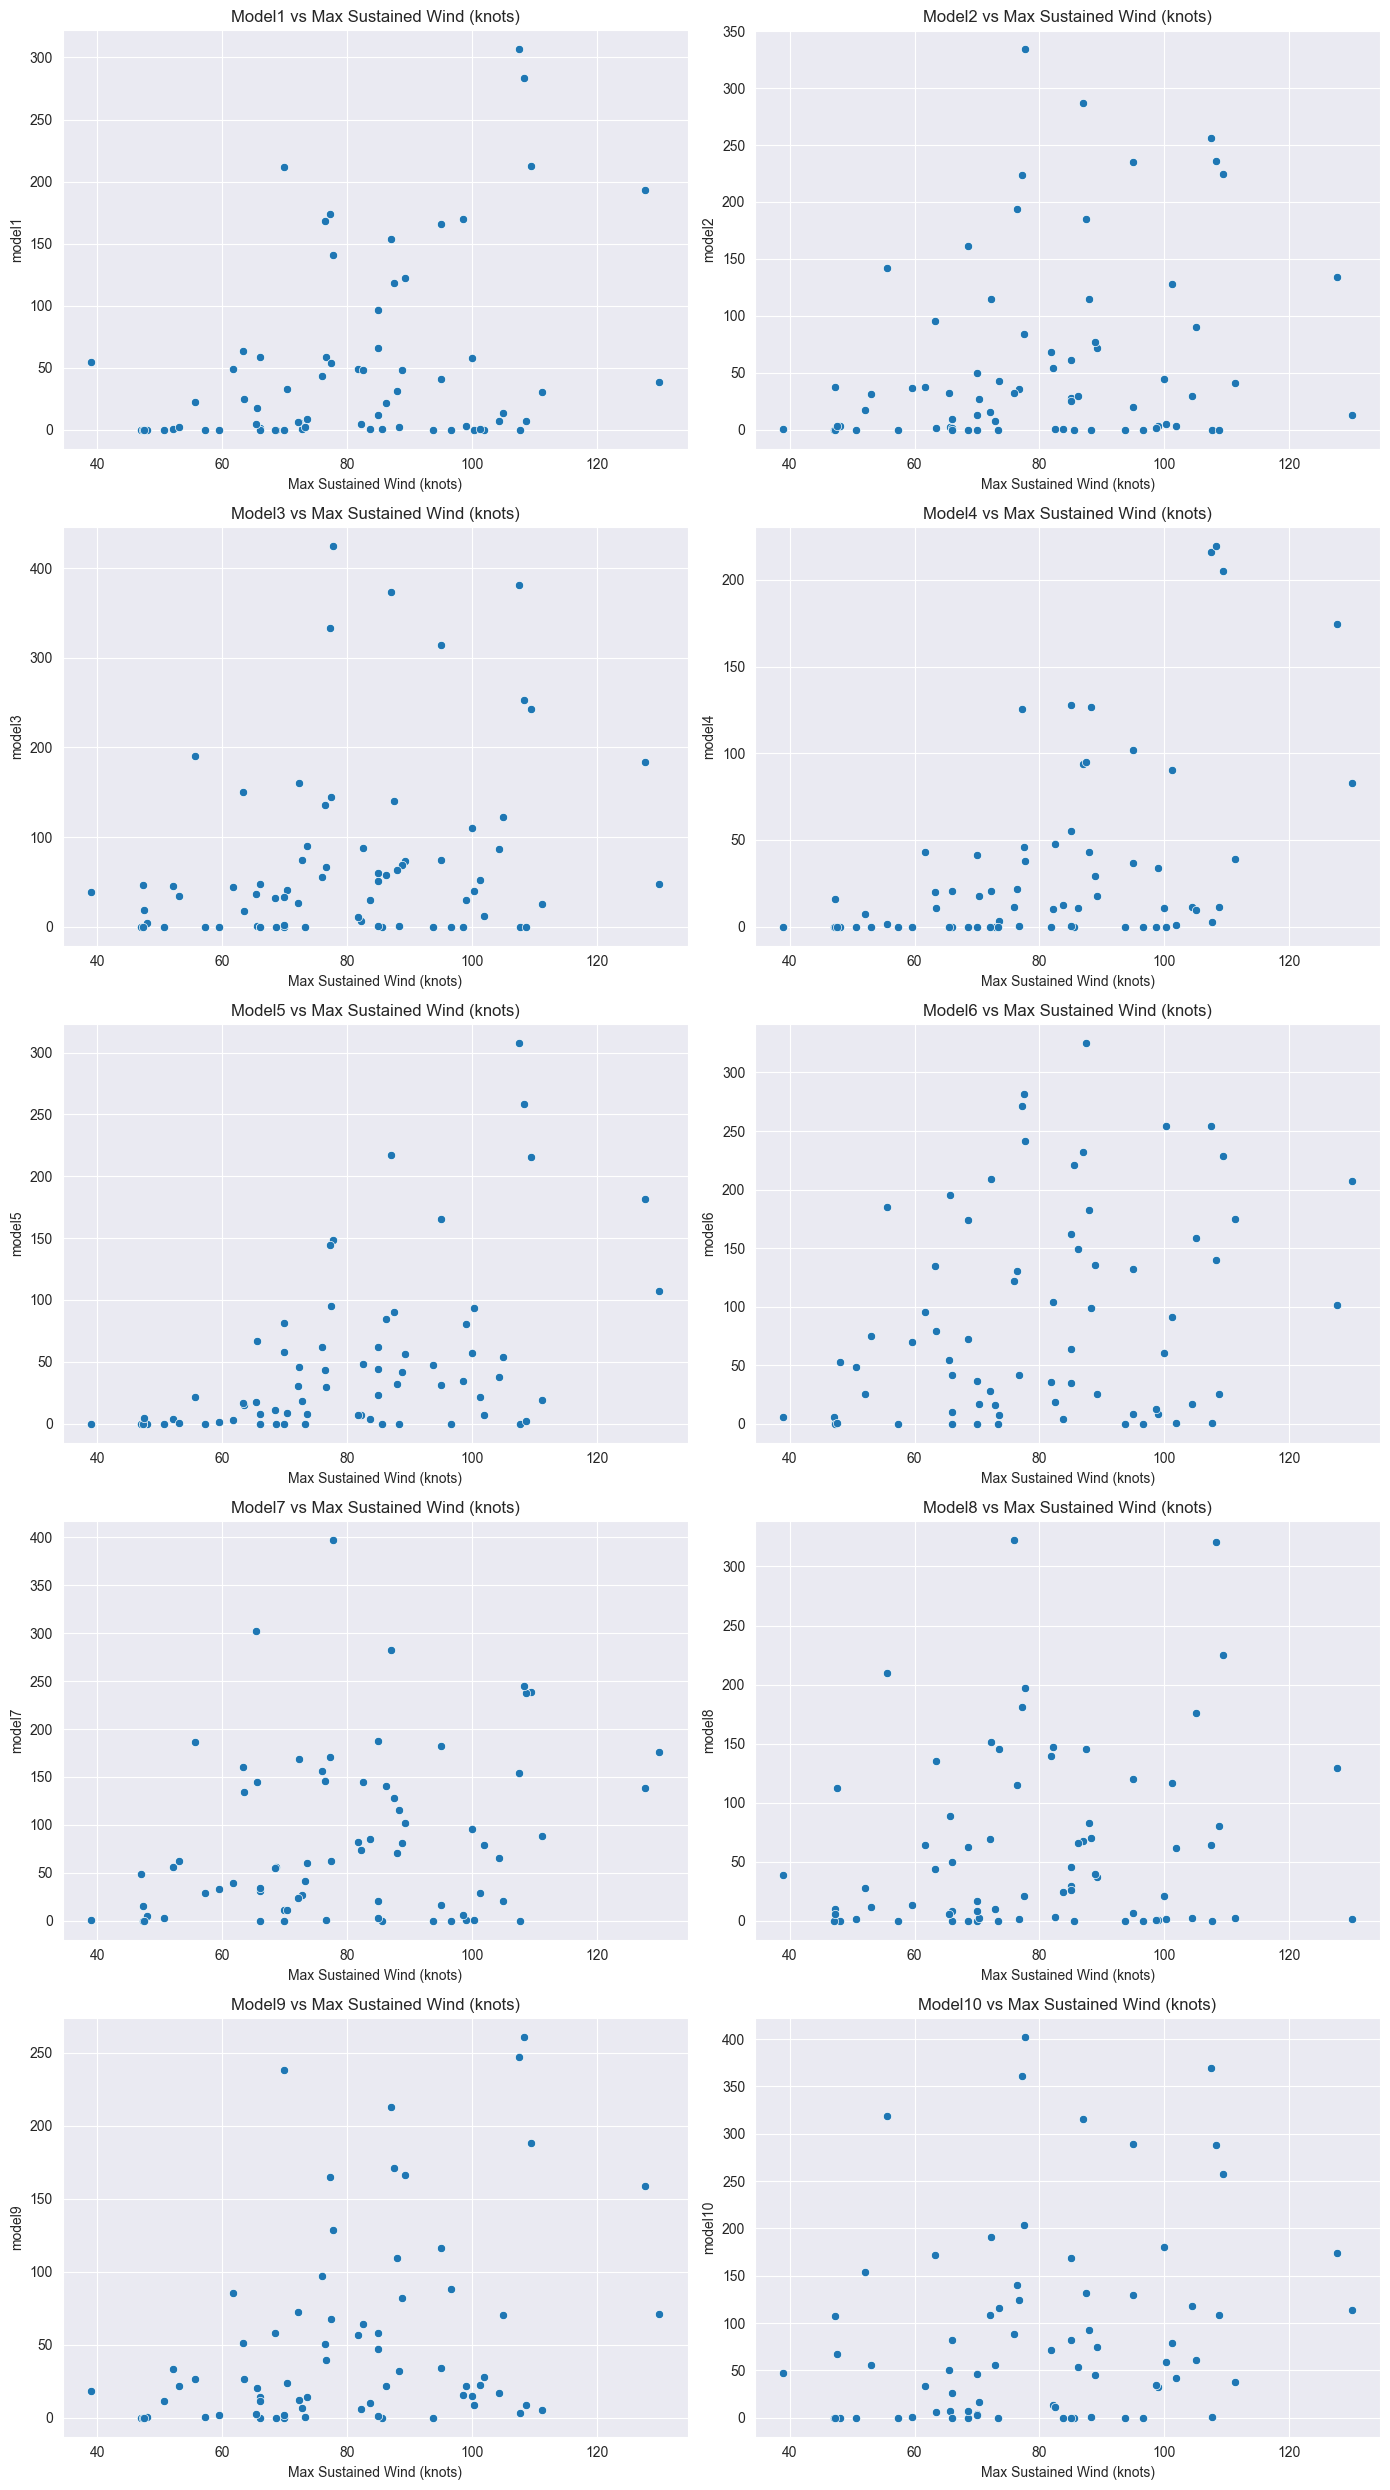

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import math

# List of model columns to plot on x-axis
model_columns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Example list

n = len(model_columns)
cols = 2
rows = math.ceil(n / cols)

fig, axes = plt.subplots(rows, cols, figsize=(14, 5 * rows))
axes = axes.flatten()  # Flatten in case it's a 2D array

for i, model_n in enumerate(model_columns):
    sns.scatterplot(data=df, y=f"model{model_n}", x='maximum_sustained_wind_knots_mean', ax=axes[i])
    axes[i].set_title(f'Model{model_n} vs Max Sustained Wind (knots)')
    axes[i].set_ylabel(f"model{model_n}")
    axes[i].set_xlabel('Max Sustained Wind (knots)')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Calculate Mean of Models. Also winsorize the mean to avoid outliers

In [5]:
model_cols = [col for col in df.columns if col.startswith('model')]
df['mean_model'] = df[model_cols].mean(axis=1)

In [6]:
import numpy as np

df['mean_model_winsor'] = np.clip(df['mean_model'], 0, 350)

# Calculate Monte Carlo Estimate. Also winsorize the estimate to avoid outliers

In [7]:
import numpy as np

# Set seed for reproducibility
seed = 69
np.random.seed(seed)

# Extract posterior samples (from column 13 onward)
posterior_samples = df.iloc[:, 13:].values

# Number of draws per hurricane
n_draws = 1000000

# Monte Carlo simulation: draw `n_draws` samples with replacement per row, then average
monte_carlo_means = np.array([
    np.mean(np.random.choice(row, size=n_draws, replace=True))
    for row in posterior_samples
])

# Store in DataFrame
df['monte_carlo_estimate'] = monte_carlo_means

In [8]:
df['monte_carlo_estimate_winsor'] = np.clip(df['monte_carlo_estimate'], 0, 350)

# Visualize the mean and monte carlo estimate against a input feature

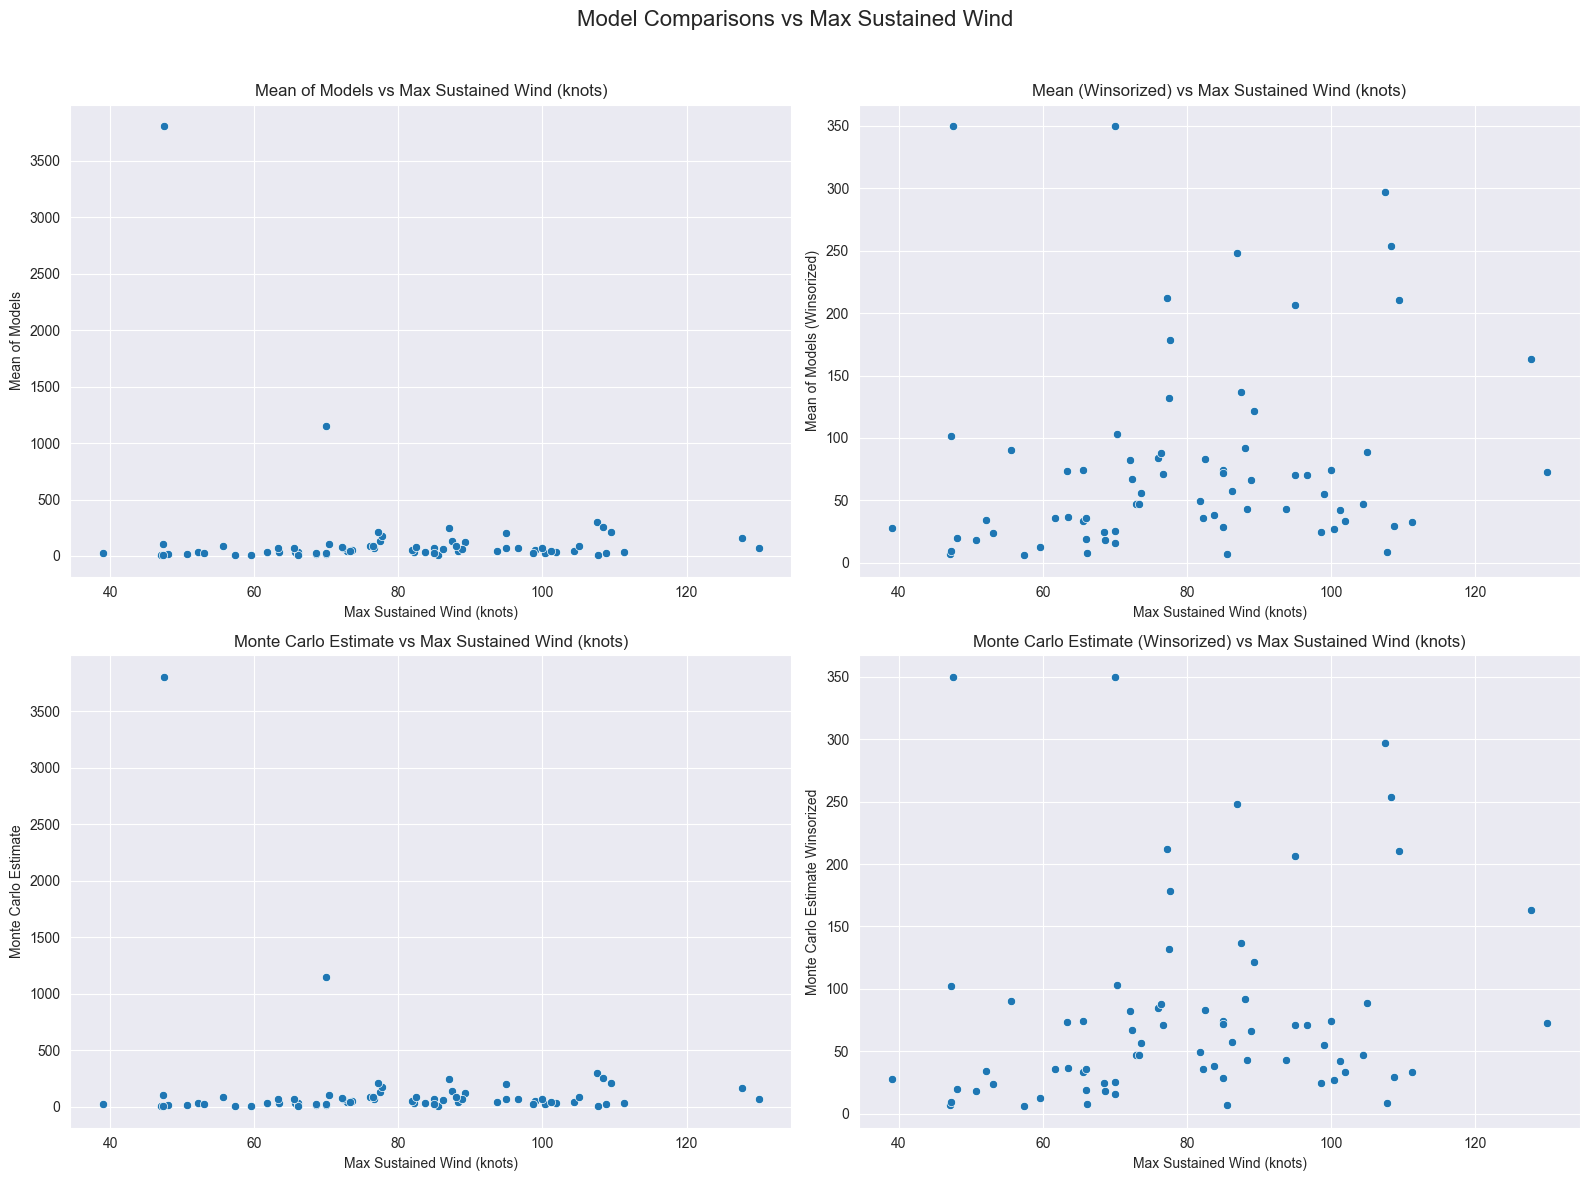

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Comparisons vs Max Sustained Wind', fontsize=16)

# Plot 1: Mean of Models
sns.scatterplot(data=df, y='mean_model', x='maximum_sustained_wind_knots_mean', ax=axes[0, 0])
axes[0, 0].set_title('Mean of Models vs Max Sustained Wind (knots)')
axes[0, 0].set_ylabel('Mean of Models')
axes[0, 0].set_xlabel('Max Sustained Wind (knots)')

# Plot 2: Mean of Models Winsorized
sns.scatterplot(data=df, y='mean_model_winsor', x='maximum_sustained_wind_knots_mean', ax=axes[0, 1])
axes[0, 1].set_title('Mean (Winsorized) vs Max Sustained Wind (knots)')
axes[0, 1].set_ylabel('Mean of Models (Winsorized)')
axes[0, 1].set_xlabel('Max Sustained Wind (knots)')

# Plot 3: Monte Carlo Estimate
sns.scatterplot(data=df, y='monte_carlo_estimate', x='maximum_sustained_wind_knots_mean', ax=axes[1, 0])
axes[1, 0].set_title('Monte Carlo Estimate vs Max Sustained Wind (knots)')
axes[1, 0].set_ylabel('Monte Carlo Estimate')
axes[1, 0].set_xlabel('Max Sustained Wind (knots)')
axes[1, 0].grid(True)

# Plot 4: Monte Carlo Estimate Winsorized
sns.scatterplot(data=df, y='monte_carlo_estimate_winsor', x='maximum_sustained_wind_knots_mean', ax=axes[1, 1])
axes[1, 1].set_title('Monte Carlo Estimate (Winsorized) vs Max Sustained Wind (knots)')
axes[1, 1].set_ylabel('Monte Carlo Estimate Winsorized')
axes[1, 1].set_xlabel('Max Sustained Wind (knots)')
axes[1, 1].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


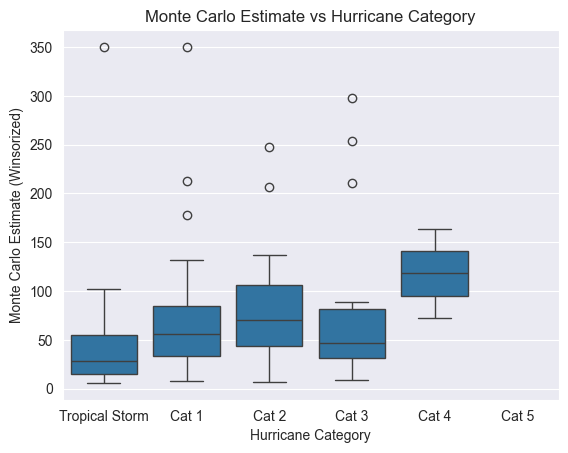

In [10]:
df['wind_bin'] = pd.cut(df['maximum_sustained_wind_knots_mean'], bins=[0, 64, 83, 95, 113, 137, np.inf],
                        labels=["Tropical Storm", "Cat 1", "Cat 2", "Cat 3", "Cat 4", "Cat 5"])

sns.boxplot(data=df, x='wind_bin', y='monte_carlo_estimate_winsor')
plt.title('Monte Carlo Estimate vs Hurricane Category')
plt.xlabel('Hurricane Category')
plt.ylabel('Monte Carlo Estimate (Winsorized)')
plt.show()

# Training Start

In [11]:
in_features = [
    'maximum_sustained_wind_knots_max',
    'maximum_sustained_wind_knots_mean',
    'central_pressure_mb_min',
    'central_pressure_mb_mean',
    'radius_of_max_wind_nm_max',
    'radius_of_max_wind_nm_mean']

output_feature = 'monte_carlo_estimate_winsor'

Appending the original 13 hurricane dataset in the synthesized one

In [12]:
df_synthetic = df

features_to_select = in_features + [output_feature]

df = df[features_to_select]
df = df.rename(columns={output_feature: "shelters"})

print("Shape of synthetic dataset:", df.shape)

# Load original 13 hurricanes
df_original = pd.read_csv("./datasets/resource_dataset_with_id_category_storm_features.csv")

# Select only the necessary feature columns
original_features_selection = ['maximum_sustained_wind_knots_max',
                'maximum_sustained_wind_knots_mean',
                'central_pressure_mb_min',
                'central_pressure_mb_mean',
                'radius_of_max_wind_nm_max',
                'radius_of_max_wind_nm_mean',
                'shelters']


# Rename 'shelters' to match current output_feature
df_original_selected = df_original[original_features_selection]
print("Shape of 13-hurricane dataset:", df_original_selected.shape)

# Now, concat synthetic + real hurricanes
df = pd.concat([df, df_original_selected], ignore_index=True)


print("Shape after combining:", df.shape)

# Check columns
print("Combined Columns:", df.columns.tolist())

# Check how many NaNs
print("NaNs in combined dataset:")
print(df.isnull().sum())
df = df.rename(columns={"shelters": output_feature})


Shape of synthetic dataset: (72, 7)
Shape of 13-hurricane dataset: (13, 7)
Shape after combining: (85, 7)
Combined Columns: ['maximum_sustained_wind_knots_max', 'maximum_sustained_wind_knots_mean', 'central_pressure_mb_min', 'central_pressure_mb_mean', 'radius_of_max_wind_nm_max', 'radius_of_max_wind_nm_mean', 'shelters']
NaNs in combined dataset:
maximum_sustained_wind_knots_max     0
maximum_sustained_wind_knots_mean    0
central_pressure_mb_min              0
central_pressure_mb_mean             0
radius_of_max_wind_nm_max            0
radius_of_max_wind_nm_mean           0
shelters                             0
dtype: int64


In [13]:
import pandas as pd
import numpy as np
from datetime import datetime

# Define a dictionary to store all evaluation results
results = {
    "Model": [],
    "MAE": [],
    "R2": [],
    "Adjusted R2": [],
    "MAPE (%)": [],
    "Hyperparameters": [],
    "Comment": []
}

# Function to log and store results
def log_results(model_name, mae_list, r2_list, adj_r2_list, mape_list, hyperparams, comment=""):
    mean_mae = round(np.mean(mae_list), 2)
    mean_r2 = round(np.mean(r2_list), 3)
    mean_adj_r2 = round(np.mean(adj_r2_list), 3)
    mean_mape = f"{round(np.mean(mape_list) * 100, 2)}%"  # Convert MAPE to percentage

    results["Model"].append(model_name)
    results["MAE"].append(mean_mae)
    results["R2"].append(mean_r2)
    results["Adjusted R2"].append(mean_adj_r2)
    results["MAPE (%)"].append(mean_mape)
    results["Hyperparameters"].append(str(hyperparams))
    results["Comment"].append(comment)

# Function to display all results
def display_results_table():
    df_results = pd.DataFrame(results)
    print("\nModel Performance Summary:")
    display(df_results)

# Function to print one model's result
def print_individual_result(model_name):
    if model_name in results["Model"]:
        idx = results["Model"].index(model_name)
        print(f"Results for {model_name}:")
        print(f"MAE         : {results['MAE'][idx]}")
        print(f"R2          : {results['R2'][idx]}")
        print(f"Adjusted R2 : {results['Adjusted R2'][idx]}")
        print(f"MAPE        : {results['MAPE (%)'][idx]}")
        print(f"Hyperparams : {results['Hyperparameters'][idx]}")
        print(f"Comment     : {results['Comment'][idx]}")
    else:
        print(f"Model '{model_name}' not found in results.")

# Function to save everything to CSV
def save_results_to_csv(filename="model_results_log"):
    # Get current datetime with milliseconds
    current_time = datetime.now().strftime("%Y%m%d_%H%M%S_%f")[:-3]
    filename = f"{filename}_{current_time}.csv"

    df_results = pd.DataFrame(results)
    df_results.to_csv(filename, index=False)
    print(f"Results saved to '{filename}'")

# Ridge Regression

Ridge regression with hyperparameter tuning using GridSearchCV and cross-validation.

In [14]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

# Set up cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)
X = df[in_features]
y = df[output_feature]
n = len(y)
p = X.shape[1]

# Step 1: Hyperparameter tuning using inner CV
param_grid = {"alpha": [0.01, 0.1, 1, 10, 100, 500]}
grid = GridSearchCV(Ridge(), param_grid, cv=kf, scoring='neg_mean_absolute_error')
grid.fit(X, y)

best_alpha = grid.best_params_["alpha"]
print(f"Best alpha from GridSearchCV: {best_alpha}")

# Step 2: Evaluate best model using outer CV
mae_list, r2_list, adj_r2_list, mape_list = [], [], [], []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = Ridge(alpha=best_alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - p - 1)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    mae_list.append(mae)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)
    mape_list.append(mape)

# Step 3: Log the results
log_results("Ridge Regression",
            mae_list, r2_list, adj_r2_list, mape_list,
            hyperparams={"alpha": best_alpha},
            comment="GridSearchCV tuned Ridge Regression (3-fold)")

print_individual_result("Ridge Regression")

Best alpha from GridSearchCV: 100
Results for Ridge Regression:
MAE         : 55.6
R2          : 0.099
Adjusted R2 : -0.155
MAPE        : 137.48%
Hyperparams : {'alpha': 100}
Comment     : GridSearchCV tuned Ridge Regression (3-fold)


Ridge regression with hyperparameter tuning using GridSearchCV and cross-validation. Log transform the target variable.

In [15]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np

kf = KFold(n_splits=3, shuffle=True, random_state=42)
X = df[in_features]
y = np.log1p(df[output_feature])  # log(1 + y) to handle 0s safely

n = len(y)
p = X.shape[1]

# Grid search on transformed target
param_grid = {"alpha": [0.01, 0.1, 1, 10, 100, 500]}
grid = GridSearchCV(Ridge(), param_grid, cv=kf, scoring='neg_mean_absolute_error')
grid.fit(X, y)

best_alpha = grid.best_params_["alpha"]
print(f"Best alpha from GridSearchCV: {best_alpha}\n")

mae_list, r2_list, adj_r2_list, mape_list = [], [], [], []

# Outer CV using best alpha
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    y_test_true = df[output_feature].iloc[test_index]  # actual (untransformed) target

    model = Ridge(alpha=best_alpha)
    model.fit(X_train, y_train)
    y_pred_log = model.predict(X_test)
    y_pred = np.expm1(y_pred_log)  # Invert log1p

    # Evaluate on original scale
    mae = mean_absolute_error(y_test_true, y_pred)
    r2 = r2_score(y_test_true, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_test_true) - 1) / (len(y_test_true) - p - 1)
    mape = mean_absolute_percentage_error(y_test_true, y_pred)

    mae_list.append(mae)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)
    mape_list.append(mape)

# Log results
log_results("Ridge Regression (Log Transformed)",
            mae_list, r2_list, adj_r2_list, mape_list,
            hyperparams={"alpha": best_alpha},
            comment="Log1p transform on target with inverse expm1 during eval")

print_individual_result("Ridge Regression (Log Transformed)")

Best alpha from GridSearchCV: 0.01

Results for Ridge Regression (Log Transformed):
MAE         : 36.47
R2          : 0.348
Adjusted R2 : 0.163
MAPE        : 58.02%
Hyperparams : {'alpha': 0.01}
Comment     : Log1p transform on target with inverse expm1 during eval


Saving the model by training on complete dataset (decided after testing all models)

In [16]:
# Train final model on full data
final_model = Ridge(alpha=best_alpha)
final_model.fit(X, y)  # X and y are your full datasets (log1p-transformed y)

# after fitting your Ridge model
import pickle

with open('ridge_model.pkl', 'wb') as f:
    pickle.dump(final_model, f)

print("Final Ridge model trained on full data and saved as 'ridge_model.pkl'")

Final Ridge model trained on full data and saved as 'ridge_model.pkl'


Ridge regression + Polynomial features + hyperparameter tuning using GridSearchCV

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Polynomial transformation
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(df[in_features])
y = df[output_feature]

kf = KFold(n_splits=3, shuffle=True, random_state=42)
mae_list, r2_list, adj_r2_list, mape_list = [], [], [], []
n, p = X_poly.shape

for train_idx, test_idx in kf.split(X_poly):
    X_train, X_test = X_poly[train_idx], X_poly[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model = Ridge(alpha=100)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    denom = len(y_test) - p - 1
    if denom > 0:
        adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / denom
    else:
        adj_r2 = r2
    mape = mean_absolute_percentage_error(y_test, y_pred)

    mae_list.append(mae)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)
    mape_list.append(mape)

log_results("Ridge + Poly (No Log)", mae_list, r2_list, adj_r2_list, mape_list,
            hyperparams=model.get_params(),
            comment="Polynomial Features (deg=2), no log-transform")
print_individual_result("Ridge + Poly (No Log)")

Results for Ridge + Poly (No Log):
MAE         : 193.0
R2          : -53.175
Adjusted R2 : -127.509
MAPE        : 340.83%
Hyperparams : {'alpha': 100, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}
Comment     : Polynomial Features (deg=2), no log-transform


Ridge regression + Polynomial features + hyperparameter tuning using GridSearchCV + log transform

In [18]:
# Log-transform target
y_log = np.log1p(df[output_feature])
y_true = df[output_feature]

mae_list, r2_list, adj_r2_list, mape_list = [], [], [], []

for train_idx, test_idx in kf.split(X_poly):
    X_train, X_test = X_poly[train_idx], X_poly[test_idx]
    y_train, y_test_log = y_log.iloc[train_idx], y_log.iloc[test_idx]
    y_test_true = y_true.iloc[test_idx]

    model = Ridge(alpha=100)
    model.fit(X_train, y_train)
    y_pred_log = model.predict(X_test)
    y_pred = np.expm1(y_pred_log)

    mae = mean_absolute_error(y_test_true, y_pred)
    r2 = r2_score(y_test_true, y_pred)
    denom = len(y_test_true) - p - 1
    if denom > 0:
        adj_r2 = 1 - (1 - r2) * (len(y_test_true) - 1) / denom
    else:
        adj_r2 = r2
    mape = mean_absolute_percentage_error(y_test_true, y_pred)

    mae_list.append(mae)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)
    mape_list.append(mape)

log_results("Ridge + Poly + Log", mae_list, r2_list, adj_r2_list, mape_list,
            hyperparams=model.get_params(),
            comment="Polynomial Features (deg=2), log1p on target, expm1 during eval")
print_individual_result("Ridge + Poly + Log")

Results for Ridge + Poly + Log:
MAE         : 142.47
R2          : -33.927
Adjusted R2 : -954.163
MAPE        : 320.71%
Hyperparams : {'alpha': 100, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': None, 'solver': 'auto', 'tol': 0.0001}
Comment     : Polynomial Features (deg=2), log1p on target, expm1 during eval


# Linear Regression

Vanilla linear regression with no hyperparameter tuning. There are no hyperparameters to tune.

In [19]:
from sklearn.linear_model import LinearRegression

kf = KFold(n_splits=3, shuffle=True, random_state=42)
X = df[in_features]
y = df[output_feature]

mae_list, r2_list, adj_r2_list, mape_list = [], [], [], []
n = len(y)
p = X.shape[1]

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - p - 1)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    mae_list.append(mae)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)
    mape_list.append(mape)

log_results("Linear Regression", mae_list, r2_list, adj_r2_list, mape_list,
            hyperparams=model.get_params(), comment="default linear regression")
print_individual_result("Linear Regression")

Results for Linear Regression:
MAE         : 55.84
R2          : 0.081
Adjusted R2 : -0.179
MAPE        : 139.79%
Hyperparams : {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Comment     : default linear regression


Linear regression with log transform on the target variable. There are no hyperparameters to tune.

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np

kf = KFold(n_splits=3, shuffle=True, random_state=42)
X = df[in_features]
y_log = np.log1p(df[output_feature])  # log1p for stability with 0s
y_true = df[output_feature]

n = len(y_log)
p = X.shape[1]

mae_list, r2_list, adj_r2_list, mape_list = [], [], [], []

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test_log = y_log.iloc[train_idx], y_log.iloc[test_idx]
    y_test_true = y_true.iloc[test_idx]

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred_log = model.predict(X_test)
    y_pred = np.expm1(y_pred_log)  # inverse of log1p

    mae = mean_absolute_error(y_test_true, y_pred)
    r2 = r2_score(y_test_true, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_test_true) - 1) / (len(y_test_true) - p - 1)
    mape = mean_absolute_percentage_error(y_test_true, y_pred)

    mae_list.append(mae)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)
    mape_list.append(mape)

# Log results
log_results("Linear Regression (Log Transformed)",
            mae_list, r2_list, adj_r2_list, mape_list,
            hyperparams=model.get_params(),
            comment="Log1p transform on target with inverse expm1 during eval")
print_individual_result("Linear Regression (Log Transformed)")

Results for Linear Regression (Log Transformed):
MAE         : 36.47
R2          : 0.348
Adjusted R2 : 0.163
MAPE        : 58.02%
Hyperparams : {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Comment     : Log1p transform on target with inverse expm1 during eval


# Random Forest Regression

Vanilla random forest regression

In [21]:
from sklearn.ensemble import RandomForestRegressor

kf = KFold(n_splits=3, shuffle=True, random_state=42)
X = df[in_features]
y = df[output_feature]

mae_list, r2_list, adj_r2_list, mape_list = [], [], [], []
n = len(y)
p = X.shape[1]

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - p - 1)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    mae_list.append(mae)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)
    mape_list.append(mape)


log_results("Random Forest Regression", mae_list, r2_list, adj_r2_list, mape_list,
            hyperparams=model.get_params(), comment="default random forest")
print_individual_result("Random Forest Regression")

Results for Random Forest Regression:
MAE         : 58.03
R2          : 0.091
Adjusted R2 : -0.166
MAPE        : 135.73%
Hyperparams : {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Comment     : default random forest


Random forest regression with simple grid search for hyperparameter tuning.

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Define complex hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# KFold setup
kf = KFold(n_splits=3, shuffle=True, random_state=42)
X = df[in_features]
y = df[output_feature]

# Run GridSearchCV
base_model = RandomForestRegressor(random_state=42)
grid = GridSearchCV(base_model, param_grid, cv=kf, scoring='r2', n_jobs=-1)
grid.fit(X, y)

# Best estimator
best_model = grid.best_estimator_

# Cross-validate with best model
mae_list, r2_list, adj_r2_list, mape_list = [], [], [], []
n = len(y)
p = X.shape[1]

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - p - 1)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    mae_list.append(mae)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)
    mape_list.append(mape)


log_results(
    model_name="Random Forest Regression Grid search hyperparameter tuning",
    mae_list=mae_list,
    r2_list=r2_list,
    adj_r2_list=adj_r2_list,
    mape_list=mape_list,
    hyperparams=grid.best_params_,
    comment="Complex GridSearchCV tuned Random Forest (3-fold)"
)

print_individual_result("Random Forest Regression Grid search hyperparameter tuning")

Results for Random Forest Regression Grid search hyperparameter tuning:
MAE         : 65.91
R2          : 0.004
Adjusted R2 : -0.277
MAPE        : 187.78%
Hyperparams : {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Comment     : Complex GridSearchCV tuned Random Forest (3-fold)


Random forest regression with randomssearchcv

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
from scipy.stats import randint

# Prepare data
kf = KFold(n_splits=3, shuffle=True, random_state=42)
X = df[in_features]
y = df[output_feature]

# Define hyperparameter grid
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None] + list(range(3, 20)),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10),
    'max_features': ['sqrt', 'log2', 0.5, 1.0]
}

# Randomized search
rs = RandomizedSearchCV(RandomForestRegressor(random_state=42), param_distributions=param_dist,
                        n_iter=50, scoring='r2', cv=kf, random_state=42, n_jobs=-1)
rs.fit(X, y)

# Best model
best_model = rs.best_estimator_

# Evaluate
mae_list, r2_list, adj_r2_list, mape_list = [], [], [], []
n = len(y)
p = X.shape[1]

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - p - 1)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    mae_list.append(mae)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)
    mape_list.append(mape)

log_results("Random Forest Regression (Randomized Tuning)", mae_list, r2_list, adj_r2_list, mape_list,
            hyperparams=rs.best_params_, comment="RandomizedSearchCV tuned Random Forest (3-fold, 50 trials)")
print_individual_result("Random Forest Regression (Randomized Tuning)")

Results for Random Forest Regression (Randomized Tuning):
MAE         : 58.41
R2          : 0.091
Adjusted R2 : -0.165
MAPE        : 141.64%
Hyperparams : {'max_depth': 6, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 246}
Comment     : RandomizedSearchCV tuned Random Forest (3-fold, 50 trials)


Random forest regression vanilla + log transform

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np

kf = KFold(n_splits=3, shuffle=True, random_state=42)
X = df[in_features]
y = np.log1p(df[output_feature])  # Log-transform

mae_list, r2_list, adj_r2_list, mape_list = [], [], [], []
n = len(y)
p = X.shape[1]

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = np.expm1(model.predict(X_test))  # Inverse transform
    y_true = np.expm1(y_test)

    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - p - 1)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    mae_list.append(mae)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)
    mape_list.append(mape)

log_results("Random Forest (Log Transformed)", mae_list, r2_list, adj_r2_list, mape_list,
            hyperparams=model.get_params(),
            comment="Vanilla RF with log1p target + expm1 inverse")
print_individual_result("Random Forest (Log Transformed)")

Results for Random Forest (Log Transformed):
MAE         : 52.02
R2          : 0.05
Adjusted R2 : -0.219
MAPE        : 86.53%
Hyperparams : {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Comment     : Vanilla RF with log1p target + expm1 inverse


Random forest regression + randomizedsearchcv + log transform

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
from scipy.stats import randint
import numpy as np

param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1.0, 'sqrt', 'log2']
}

kf = KFold(n_splits=3, shuffle=True, random_state=42)
X = df[in_features]
y = np.log1p(df[output_feature])  # Log-transform

mae_list, r2_list, adj_r2_list, mape_list = [], [], [], []
n = len(y)
p = X.shape[1]

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    base_model = RandomForestRegressor(random_state=42)
    random_search = RandomizedSearchCV(base_model, param_distributions=param_dist,
                                       n_iter=50, cv=2, scoring="r2", random_state=42, n_jobs=-1)
    random_search.fit(X_train, y_train)

    best_model = random_search.best_estimator_
    y_pred = np.expm1(best_model.predict(X_test))  # Inverse transform
    y_true = np.expm1(y_test)

    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - p - 1)
    mape = mean_absolute_percentage_error(y_true, y_pred)

    mae_list.append(mae)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)
    mape_list.append(mape)

log_results("Random Forest (Log + RandomSearch)", mae_list, r2_list, adj_r2_list, mape_list,
            hyperparams=random_search.best_params_,
            comment="RandomizedSearchCV + log1p target + expm1 inverse")
print_individual_result("Random Forest (Log + RandomSearch)")

Results for Random Forest (Log + RandomSearch):
MAE         : 54.76
R2          : -0.04
Adjusted R2 : -0.333
MAPE        : 98.73%
Hyperparams : {'max_depth': None, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 286}
Comment     : RandomizedSearchCV + log1p target + expm1 inverse


# MLP Regression

Vanilla MLP regression with no hyperparameter tuning

In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Prepare data
X = torch.tensor(df[in_features].values, dtype=torch.float32).to(device)
y = torch.tensor(df[output_feature].values, dtype=torch.float32).view(-1, 1).to(device)

class MLP(nn.Module):
    def __init__(self, input_dim):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )
    def forward(self, x):
        return self.model(x)

kf = KFold(n_splits=3, shuffle=True, random_state=42)

mae_list, r2_list, adj_r2_list, mape_list = [], [], [], []
p = X.shape[1]

for train_idx, test_idx in kf.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    model = MLP(input_dim=p).to(device)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    # Training
    model.train()
    for epoch in range(500):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

    # Evaluation
    model.eval()
    with torch.no_grad():
        preds = model(X_test).cpu().numpy().flatten()
        y_true = y_test.cpu().numpy().flatten()

    mae = mean_absolute_error(y_true, preds)
    r2 = r2_score(y_true, preds)
    adj_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - p - 1)
    mape = mean_absolute_percentage_error(y_true, preds)

    mae_list.append(mae)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)
    mape_list.append(mape)


log_results("MLP Regressor", mae_list, r2_list, adj_r2_list, mape_list,
            hyperparams={"layers": [32], "epochs": 100, "lr": 0.01, "batch_size": 16},
            comment="default MLP")
print_individual_result("MLP Regressor")

Using device: cuda
Results for MLP Regressor:
MAE         : 68.66
R2          : -0.079
Adjusted R2 : -0.383
MAPE        : 154.31%
Hyperparams : {'layers': [32], 'epochs': 100, 'lr': 0.01, 'batch_size': 16}
Comment     : default MLP


MLP Regressor with Optuna hyperparameter tuning and no log transform

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import optuna
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Prepare data
X = torch.tensor(df[in_features].values, dtype=torch.float32).to(device)
y = torch.tensor(df[output_feature].values, dtype=torch.float32).view(-1, 1).to(device)

def objective(trial):
    hidden_layer_sizes_str = trial.suggest_categorical("hidden_layer_sizes", [
        "(16,)", "(32,)", "(64,)", "(128,)", "(256,)",
        "(64, 32)", "(128, 64)", "(32, 16)", "(100, 50)", "(256, 128)",
        "(64, 32, 16)", "(128, 64, 32)", "(100, 50, 25)", "(32, 32, 32)", "(256, 128, 64)"
    ])
    hidden_layer_sizes = eval(hidden_layer_sizes_str)

    activation_name = trial.suggest_categorical("activation", ["relu", "tanh"])
    activation_map = {"relu": nn.ReLU, "tanh": nn.Tanh}
    activation_fn = activation_map[activation_name]

    learning_rate = trial.suggest_categorical("lr", [0.001, 0.01])
    weight_decay = trial.suggest_categorical("weight_decay", [0.0001, 0.001])
    epochs = trial.suggest_categorical("epochs", [200, 400, 600])

    class MLP(nn.Module):
        def __init__(self, input_dim):
            super().__init__()
            layers = []
            for h in hidden_layer_sizes:
                layers.append(nn.Linear(input_dim, h))
                layers.append(activation_fn())
                input_dim = h
            layers.append(nn.Linear(input_dim, 1))
            self.net = nn.Sequential(*layers)

        def forward(self, x):
            return self.net(x)

    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    p = X.shape[1]
    mae_list, r2_list, adj_r2_list, mape_list = [], [], [], []

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = MLP(p).to(device)
        optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
        criterion = nn.MSELoss()

        model.train()
        for _ in range(epochs):
            optimizer.zero_grad()
            loss = criterion(model(X_train), y_train)
            loss.backward()
            optimizer.step()

        model.eval()
        with torch.no_grad():
            preds = model(X_test).cpu().numpy().flatten()
            y_true = y_test.cpu().numpy().flatten()

        mae = mean_absolute_error(y_true, preds)
        r2 = r2_score(y_true, preds)
        adj_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - p - 1)
        mape = mean_absolute_percentage_error(y_true, preds)

        mae_list.append(mae)
        r2_list.append(r2)
        adj_r2_list.append(adj_r2)
        mape_list.append(mape)

    trial.set_user_attr("mae_list", mae_list)
    trial.set_user_attr("r2_list", r2_list)
    trial.set_user_attr("adj_r2_list", adj_r2_list)
    trial.set_user_attr("mape_list", mape_list)

    return np.mean(mae_list)

# Run Optuna tuning
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# Log results
log_results(
    "MLP (Optuna - No log transform)",
    study.best_trial.user_attrs["mae_list"],
    study.best_trial.user_attrs["r2_list"],
    study.best_trial.user_attrs["adj_r2_list"],
    study.best_trial.user_attrs["mape_list"],
    hyperparams=study.best_trial.params,
    comment="Optuna tuned PyTorch MLP on normal target"
)

print_individual_result("MLP (Optuna - No log transform)")

C:\RIT\Spring 2025\788 Capstone\Lets_Go\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[I 2025-04-19 20:02:03,531] A new study created in memory with name: no-name-7cb80a56-1096-421e-b5c6-ccb19223906c


Using device: cuda


[I 2025-04-19 20:02:05,391] Trial 0 finished with value: 74.58978271484375 and parameters: {'hidden_layer_sizes': '(64, 32, 16)', 'activation': 'relu', 'lr': 0.01, 'weight_decay': 0.0001, 'epochs': 600}. Best is trial 0 with value: 74.58978271484375.
[I 2025-04-19 20:02:06,007] Trial 1 finished with value: 65.33109664916992 and parameters: {'hidden_layer_sizes': '(128, 64, 32)', 'activation': 'relu', 'lr': 0.01, 'weight_decay': 0.001, 'epochs': 200}. Best is trial 1 with value: 65.33109664916992.
[I 2025-04-19 20:02:07,018] Trial 2 finished with value: 67.75985717773438 and parameters: {'hidden_layer_sizes': '(32, 16)', 'activation': 'relu', 'lr': 0.001, 'weight_decay': 0.0001, 'epochs': 400}. Best is trial 1 with value: 65.33109664916992.
[I 2025-04-19 20:02:08,215] Trial 3 finished with value: 64.77500534057617 and parameters: {'hidden_layer_sizes': '(256, 128, 64)', 'activation': 'tanh', 'lr': 0.01, 'weight_decay': 0.001, 'epochs': 400}. Best is trial 3 with value: 64.77500534057617

Results for MLP (Optuna - No log transform):
MAE         : 61.05
R2          : -0.142
Adjusted R2 : -0.463
MAPE        : 122.75%
Hyperparams : {'hidden_layer_sizes': '(32,)', 'activation': 'tanh', 'lr': 0.01, 'weight_decay': 0.001, 'epochs': 200}
Comment     : Optuna tuned PyTorch MLP on normal target


MLP Regressor with Optuna hyperparameter tuning and log transform

In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
import optuna
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np

# Set device for training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Prepare log-transformed data
X = torch.tensor(df[in_features].values, dtype=torch.float32).to(device)
y = torch.tensor(np.log1p(df[output_feature].values), dtype=torch.float32).view(-1, 1).to(device)

def objective_log(trial):
    hidden_layer_sizes_str = trial.suggest_categorical("hidden_layer_sizes", [
        "(16,)", "(32,)", "(64,)", "(128,)", "(256,)",
        "(64, 32)", "(128, 64)", "(32, 16)", "(100, 50)", "(256, 128)",
        "(64, 32, 16)", "(128, 64, 32)", "(100, 50, 25)", "(32, 32, 32)", "(256, 128, 64)"
    ])
    hidden_layer_sizes = eval(hidden_layer_sizes_str)

    activation_name = trial.suggest_categorical("activation", ["relu", "tanh"])
    activation_map = {"relu": nn.ReLU, "tanh": nn.Tanh}
    activation_fn = activation_map[activation_name]

    learning_rate = trial.suggest_categorical("lr", [0.001, 0.01])
    weight_decay = trial.suggest_categorical("weight_decay", [0.0001, 0.001])
    epochs = trial.suggest_categorical("epochs", [200, 400, 600])

    class MLP(nn.Module):
        def __init__(self, input_dim):
            super().__init__()
            layers = []
            for h in hidden_layer_sizes:
                layers.append(nn.Linear(input_dim, h))
                layers.append(activation_fn())
                input_dim = h
            layers.append(nn.Linear(input_dim, 1))
            self.net = nn.Sequential(*layers)

        def forward(self, x):
            return self.net(x)

    kf = KFold(n_splits=3, shuffle=True, random_state=42)
    p = X.shape[1]
    mae_list, r2_list, adj_r2_list, mape_list = [], [], [], []

    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model = MLP(p).to(device)
        optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
        criterion = nn.MSELoss()

        model.train()
        for _ in range(epochs):
            optimizer.zero_grad()
            loss = criterion(model(X_train), y_train)
            loss.backward()
            optimizer.step()

        model.eval()
        with torch.no_grad():
            y_pred_log = model(X_test).detach().cpu().numpy().flatten()
            y_true_log = y_test.detach().cpu().numpy().flatten()

        y_pred = np.expm1(y_pred_log)
        y_true = np.expm1(y_true_log)

        mae = mean_absolute_error(y_true, y_pred)
        r2 = r2_score(y_true, y_pred)
        adj_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - p - 1)
        mape = mean_absolute_percentage_error(y_true, y_pred)

        mae_list.append(mae)
        r2_list.append(r2)
        adj_r2_list.append(adj_r2)
        mape_list.append(mape)

    trial.set_user_attr("mae_list", mae_list)
    trial.set_user_attr("r2_list", r2_list)
    trial.set_user_attr("adj_r2_list", adj_r2_list)
    trial.set_user_attr("mape_list", mape_list)

    return np.mean(mae_list)

# Run tuning
study_log = optuna.create_study(direction="minimize")
study_log.optimize(objective_log, n_trials=50)

# Log best result
log_results(
    "MLP (Optuna - Log transformed)",
    study_log.best_trial.user_attrs["mae_list"],
    study_log.best_trial.user_attrs["r2_list"],
    study_log.best_trial.user_attrs["adj_r2_list"],
    study_log.best_trial.user_attrs["mape_list"],
    hyperparams=study_log.best_trial.params,
    comment="Optuna tuned PyTorch MLP on log1p target with expm1 inverse"
)

print_individual_result("MLP (Optuna - Log transformed)")

[I 2025-04-19 20:02:42,703] A new study created in memory with name: no-name-72968385-7046-4f6c-a8c6-140924c5d70d


Using device: cuda


[I 2025-04-19 20:02:43,922] Trial 0 finished with value: 56.73166020711263 and parameters: {'hidden_layer_sizes': '(128, 64)', 'activation': 'relu', 'lr': 0.001, 'weight_decay': 0.001, 'epochs': 400}. Best is trial 0 with value: 56.73166020711263.
[I 2025-04-19 20:02:45,846] Trial 1 finished with value: 61.405957539876304 and parameters: {'hidden_layer_sizes': '(32, 32, 32)', 'activation': 'tanh', 'lr': 0.01, 'weight_decay': 0.001, 'epochs': 600}. Best is trial 0 with value: 56.73166020711263.
[I 2025-04-19 20:02:46,997] Trial 2 finished with value: 60.01815541585287 and parameters: {'hidden_layer_sizes': '(100, 50)', 'activation': 'relu', 'lr': 0.01, 'weight_decay': 0.0001, 'epochs': 400}. Best is trial 0 with value: 56.73166020711263.
[I 2025-04-19 20:02:48,825] Trial 3 finished with value: 59.57892990112305 and parameters: {'hidden_layer_sizes': '(100, 50)', 'activation': 'relu', 'lr': 0.01, 'weight_decay': 0.001, 'epochs': 600}. Best is trial 0 with value: 56.73166020711263.
[I 202

Results for MLP (Optuna - Log transformed):
MAE         : 53.96
R2          : 0.14
Adjusted R2 : -0.102
MAPE        : 89.57%
Hyperparams : {'hidden_layer_sizes': '(64, 32, 16)', 'activation': 'relu', 'lr': 0.001, 'weight_decay': 0.001, 'epochs': 400}
Comment     : Optuna tuned PyTorch MLP on log1p target with expm1 inverse


# XGBoost Regression

In [29]:
from xgboost import XGBRegressor

kf = KFold(n_splits=3, shuffle=True, random_state=42)
X = df[in_features]
y = df[output_feature]

mae_list, r2_list, adj_r2_list, mape_list = [], [], [], []
n = len(y)
p = X.shape[1]

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model = XGBRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - p - 1)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    mae_list.append(mae)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)
    mape_list.append(mape)


log_results("XGBoost Regressor", mae_list, r2_list, adj_r2_list, mape_list,
            hyperparams=model.get_params(), comment="default XGBoost")
print_individual_result("XGBoost Regressor")

Results for XGBoost Regressor:
MAE         : 57.38
R2          : 0.058
Adjusted R2 : -0.207
MAPE        : 128.81%
Hyperparams : {'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'feature_weights': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': 42, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': No

XGBoost + Grid search

In [30]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

kf = KFold(n_splits=3, shuffle=True, random_state=42)
X = df[in_features]
y = df[output_feature]

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 3]
}

# GridSearchCV with internal 3-fold CV
grid = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid.fit(X, y)
best_model = grid.best_estimator_

# Cross-validation performance logging
mae_list, r2_list, adj_r2_list, mape_list = [], [], [], []
n = len(y)
p = X.shape[1]

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    best_model.fit(X_train, y_train)
    y_pred = best_model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - p - 1)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    mae_list.append(mae)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)
    mape_list.append(mape)

log_results("XGBoost + GridSearch", mae_list, r2_list, adj_r2_list, mape_list,
            hyperparams=grid.best_params_,
            comment="GridSearchCV tuned XGBoost (no log)")
print_individual_result("XGBoost + GridSearch")

Results for XGBoost + GridSearch:
MAE         : 59.54
R2          : -0.003
Adjusted R2 : -0.285
MAPE        : 147.83%
Hyperparams : {'learning_rate': 0.01, 'max_depth': 7, 'min_child_weight': 3, 'n_estimators': 150}
Comment     : GridSearchCV tuned XGBoost (no log)


XGBoost + RandomizedSearchCV + log transform

In [31]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error
import numpy as np

kf = KFold(n_splits=3, shuffle=True, random_state=42)
X = df[in_features]
y = np.log1p(df[output_feature])  # Log transform

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 3]
}

grid = GridSearchCV(XGBRegressor(random_state=42), param_grid, cv=3, scoring='r2', n_jobs=-1)
grid.fit(X, y)
best_model = grid.best_estimator_

mae_list, r2_list, adj_r2_list, mape_list = [], [], [], []
n = len(y)
p = X.shape[1]

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    best_model.fit(X_train, y_train)
    y_pred_log = best_model.predict(X_test)
    y_pred = np.expm1(y_pred_log)

    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = 1 - (1 - r2) * (len(y_test) - 1) / (len(y_test) - p - 1)
    mape = mean_absolute_percentage_error(y_test, y_pred)

    mae_list.append(mae)
    r2_list.append(r2)
    adj_r2_list.append(adj_r2)
    mape_list.append(mape)

log_results("XGBoost + GridSearch (Log)", mae_list, r2_list, adj_r2_list, mape_list,
            hyperparams=grid.best_params_,
            comment="GridSearchCV tuned XGBoost with log1p target + expm1 inverse")
print_individual_result("XGBoost + GridSearch (Log)")

Results for XGBoost + GridSearch (Log):
MAE         : 62.58
R2          : -6444.166
Adjusted R2 : -8262.891
MAPE        : 1547.32%
Hyperparams : {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100}
Comment     : GridSearchCV tuned XGBoost with log1p target + expm1 inverse


Save the XGBoost + GridSearch (Log) model

In [32]:
# Train final XGBoost model on full data and save

best_model.fit(X, y)  # Train best model on full dataset

import pickle
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)

print("Final XGBoost model trained on full data and saved as 'xgb_model.pkl'")

Final XGBoost model trained on full data and saved as 'xgb_model.pkl'


In [33]:
display_results_table()


Model Performance Summary:


,Model,MAE,R2,Adjusted R2,MAPE (%),Hyperparameters,Comment
0,Ridge Regression,55.60,0.099,-0.155,137.48%,{'alpha': 100},GridSearchCV tuned Ridge Regression (3-fold)
1,Ridge Regression (Log Transformed),36.47,0.348,0.163,58.02%,{'alpha': 0.01},Log1p transform on target with inverse expm1 d...
2,Ridge + Poly (No Log),193.00,-53.175,-127.509,340.83%,"{'alpha': 100, 'copy_X': True, 'fit_intercept'...","Polynomial Features (deg=2), no log-transform"
3,Ridge + Poly + Log,142.47,-33.927,-954.163,320.71%,"{'alpha': 100, 'copy_X': True, 'fit_intercept'...","Polynomial Features (deg=2), log1p on target, ..."
4,Linear Regression,55.84,0.081,-0.179,139.79%,"{'copy_X': True, 'fit_intercept': True, 'n_job...",default linear regression
5,Linear Regression (Log Transformed),36.47,0.348,0.163,58.02%,"{'copy_X': True, 'fit_intercept': True, 'n_job...",Log1p transform on target with inverse expm1 d...
6,Random Forest Regression,58.03,0.091,-0.166,135.73%,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",default random forest
7,Random Forest Regression Grid search hyperpara...,65.91,0.004,-0.277,187.78%,"{'max_depth': None, 'max_features': 'sqrt', 'm...",Complex GridSearchCV tuned Random Forest (3-fold)
8,Random Forest Regression (Randomized Tuning),58.41,0.091,-0.165,141.64%,"{'max_depth': 6, 'max_features': 1.0, 'min_sam...",RandomizedSearchCV tuned Random Forest (3-fold...
9,Random Forest (Log Transformed),52.02,0.050,-0.219,86.53%,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",Vanilla RF with log1p target + expm1 inverse


In [34]:
save_results_to_csv(filename="model_results_log")

Results saved to 'model_results_log_20250419_200343_149.csv'


# SHAP for Model Interpretability

In [67]:
!pip install shap

SHAP for Ridge Regression

In [68]:
import shap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

# Prepare data
X = df[in_features]
y_log = np.log1p(df[output_feature])  # Log-transformed target

# Train Ridge model on log-transformed target
ridge_model_log = Ridge(alpha=100)
ridge_model_log.fit(X, y_log)

# SHAP Explainer and SHAP values
explainer_ridge = shap.Explainer(ridge_model_log, X)
shap_values_ridge = explainer_ridge(X)

SHAP for XGBoost

In [69]:
import shap
from xgboost import XGBRegressor
import numpy as np
import matplotlib.pyplot as plt

# Train the model (on log-transformed target)
X = df[in_features]
y = np.log1p(df[output_feature])  # Log transform

model = XGBRegressor(
    learning_rate=0.1,
    max_depth=3,
    min_child_weight=3,
    n_estimators=150,
    random_state=42
)
model.fit(X, y)

# SHAP Explainer
explainer_xgb = shap.Explainer(model, X)
shap_values_xgb = explainer_xgb(X)

In [82]:
import copy

# Deep copy the SHAP Explanation object
shap_values_ridge_clean = copy.deepcopy(shap_values_ridge)
shap_values_xgb_clean = copy.deepcopy(shap_values_xgb)

# Now you can modify safely
# for ridge regression
new_feature_names_ridge = [name.replace("_", " ").title() for name in shap_values_ridge_clean.feature_names]
shap_values_ridge_clean.feature_names = new_feature_names_ridge
og_shap_values_ridge = shap_values_ridge
shap_values_ridge = shap_values_ridge_clean

# for xgb
new_feature_names_xgb = [name.replace("_", " ").title() for name in shap_values_xgb_clean.feature_names]
shap_values_xgb_clean.feature_names = new_feature_names_xgb
og_shap_values_xgb = shap_values_xgb
shap_values_xgb = shap_values_xgb_clean

Beeswarm plots for SHAP values

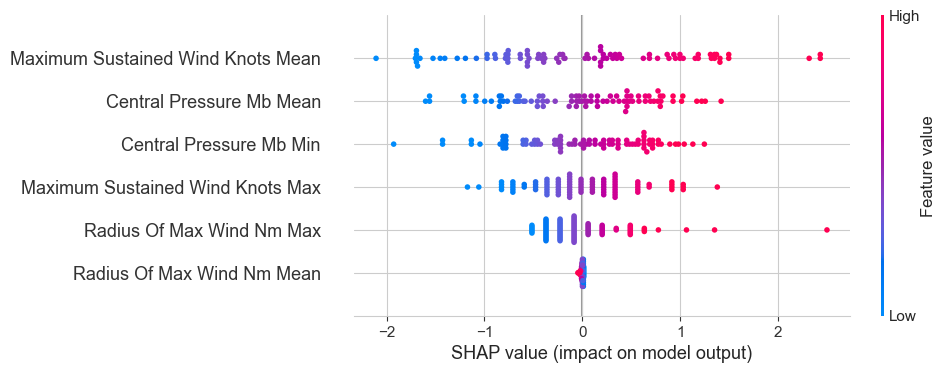

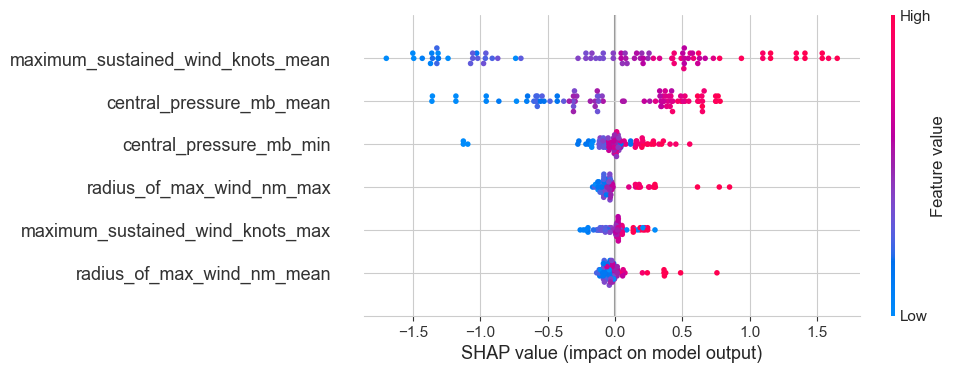

In [81]:
shap.plots.beeswarm(shap_values_ridge)
shap.plots.beeswarm(shap_values_xgb)

Bar plots for SHAP values

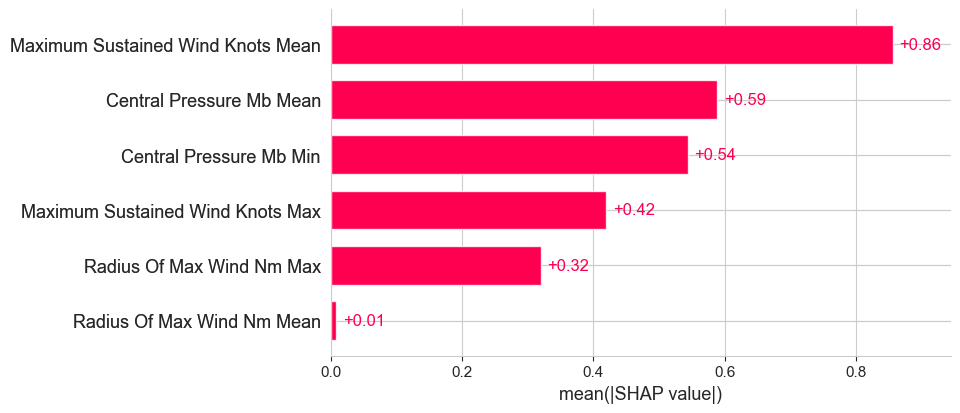

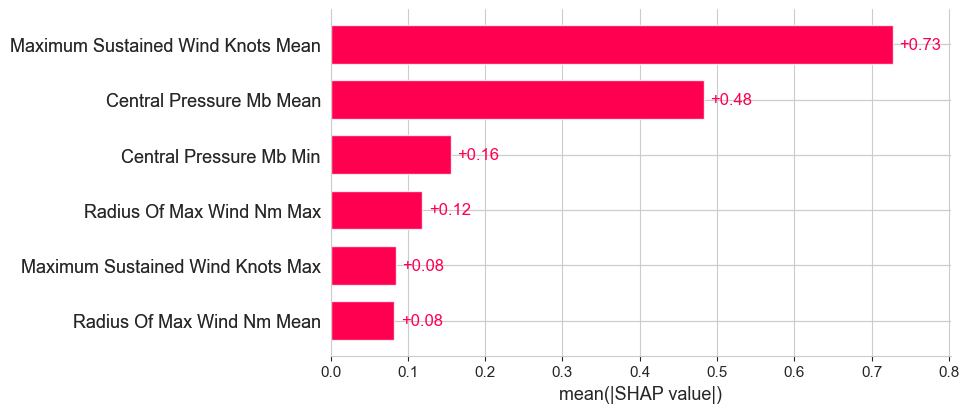

In [84]:
shap.plots.bar(shap_values_ridge)
shap.plots.bar(shap_values_xgb)

Waterfall plots for SHAP values

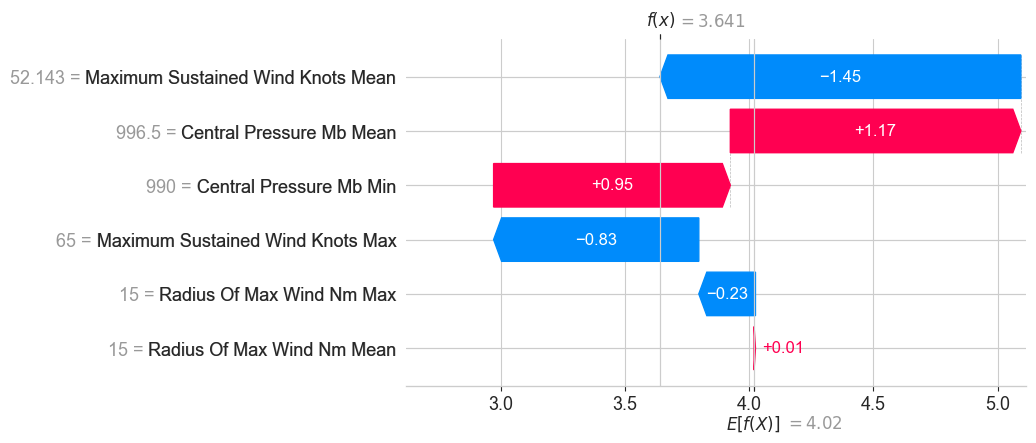

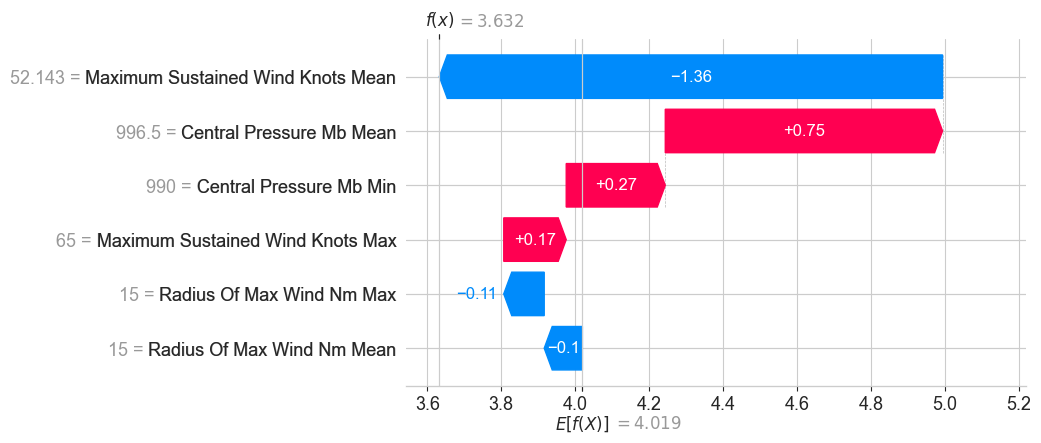

In [85]:
shap.plots.waterfall(shap_values_ridge[0])
shap.plots.waterfall(shap_values_xgb[0])

Decision plots for SHAP values

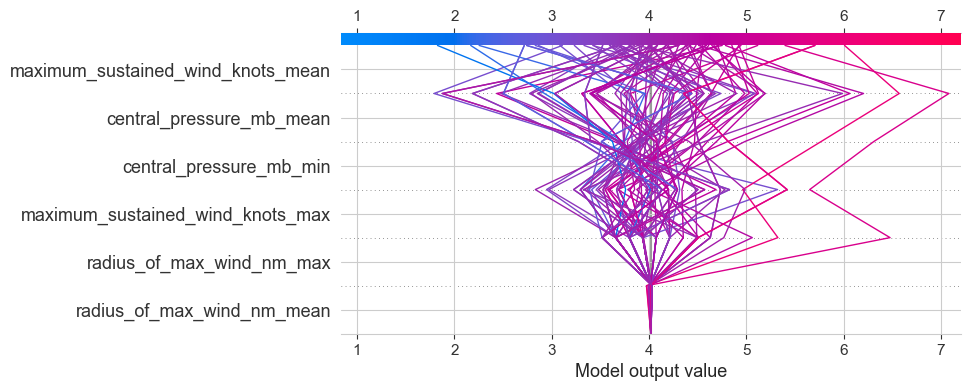

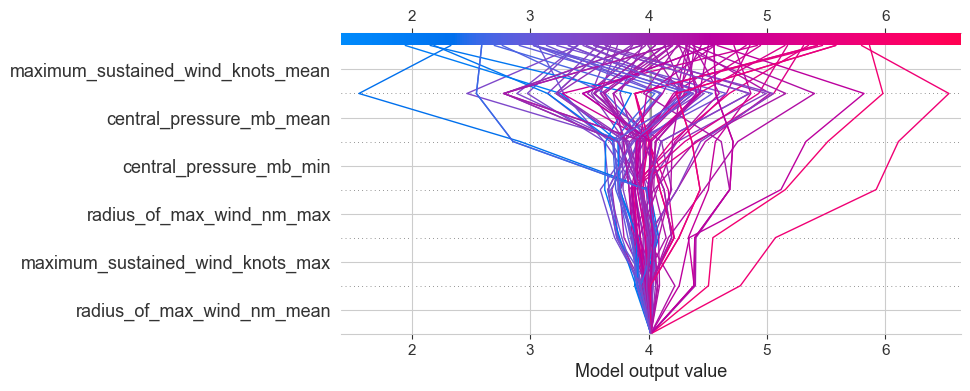

In [86]:
shap.decision_plot(
    explainer_ridge.expected_value,
    shap_values_ridge.values,
    feature_names=in_features
)
shap.decision_plot(
    explainer_xgb.expected_value,
    shap_values_xgb.values,
    feature_names=in_features
)

Plot prediction vs True value scatter plot for the Ridge Regression model with log transformed output by the model

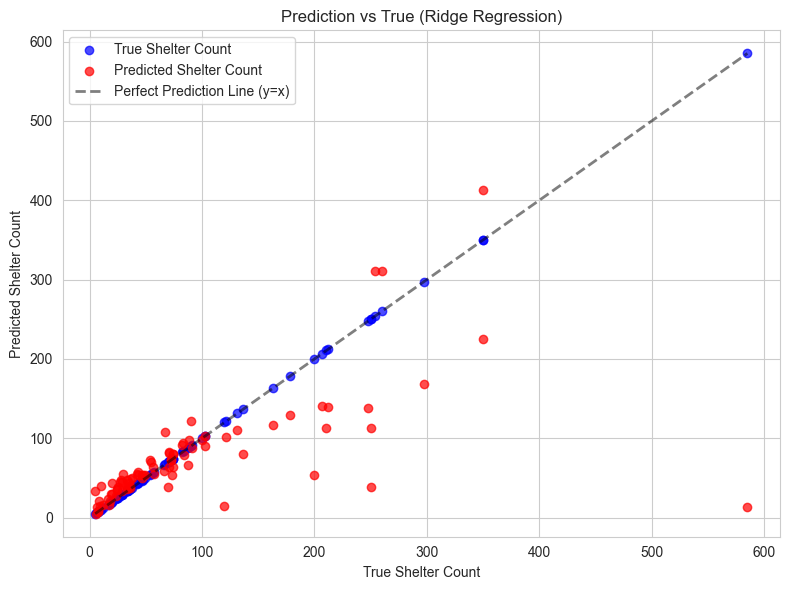

In [87]:
import matplotlib.pyplot as plt
import numpy as np

# Plot for Ridge Regression
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_true, color='blue', label='True Shelter Count', alpha=0.7)
plt.scatter(y_true, y_pred_ridge, color='red', label='Predicted Shelter Count', alpha=0.7)
min_val_ridge = min(y_true.min(), y_pred_ridge.min())
max_val_ridge = max(y_true.max(), y_pred_ridge.max())
plt.plot([min_val_ridge, max_val_ridge], [min_val_ridge, max_val_ridge], 'k--', lw=2, label='Perfect Prediction Line (y=x)', alpha=0.5)
plt.xlabel('True Shelter Count')
plt.ylabel('Predicted Shelter Count')
plt.title('Prediction vs True (Ridge Regression)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

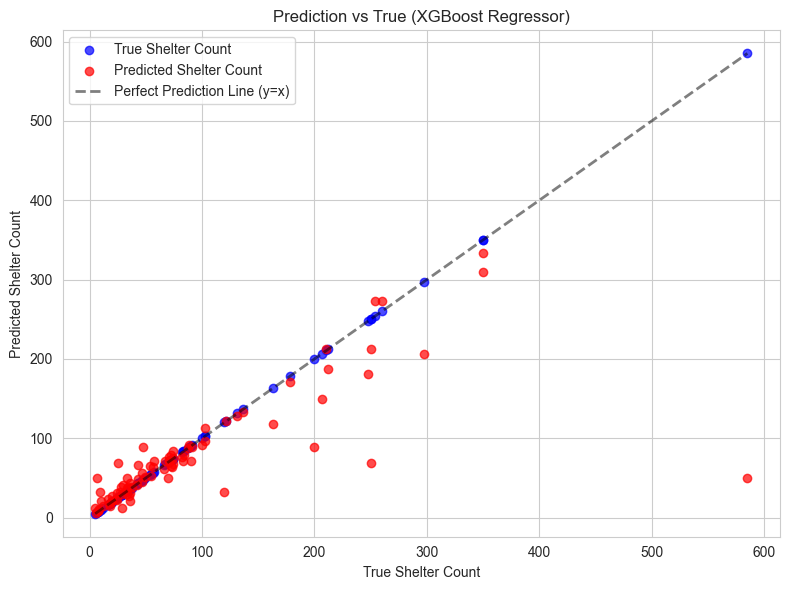

In [88]:
import matplotlib.pyplot as plt
import numpy as np

# Plot for XGBoost Regressor
plt.figure(figsize=(8, 6))
plt.scatter(y_true, y_true, color='blue', label='True Shelter Count', alpha=0.7)
plt.scatter(y_true, y_pred_xgb, color='red', label='Predicted Shelter Count', alpha=0.7)
min_val_xgb = min(y_true.min(), y_pred_xgb.min())
max_val_xgb = max(y_true.max(), y_pred_xgb.max())
plt.plot([min_val_xgb, max_val_xgb], [min_val_xgb, max_val_xgb], 'k--', lw=2, label='Perfect Prediction Line (y=x)', alpha=0.5)
plt.xlabel('True Shelter Count')
plt.ylabel('Predicted Shelter Count')
plt.title('Prediction vs True (XGBoost Regressor)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
